In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import joblib
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [2]:
Smarket = pd.read_csv('/opt/apps/ml-data/ISLR/Smarket.csv')

In [3]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [6]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


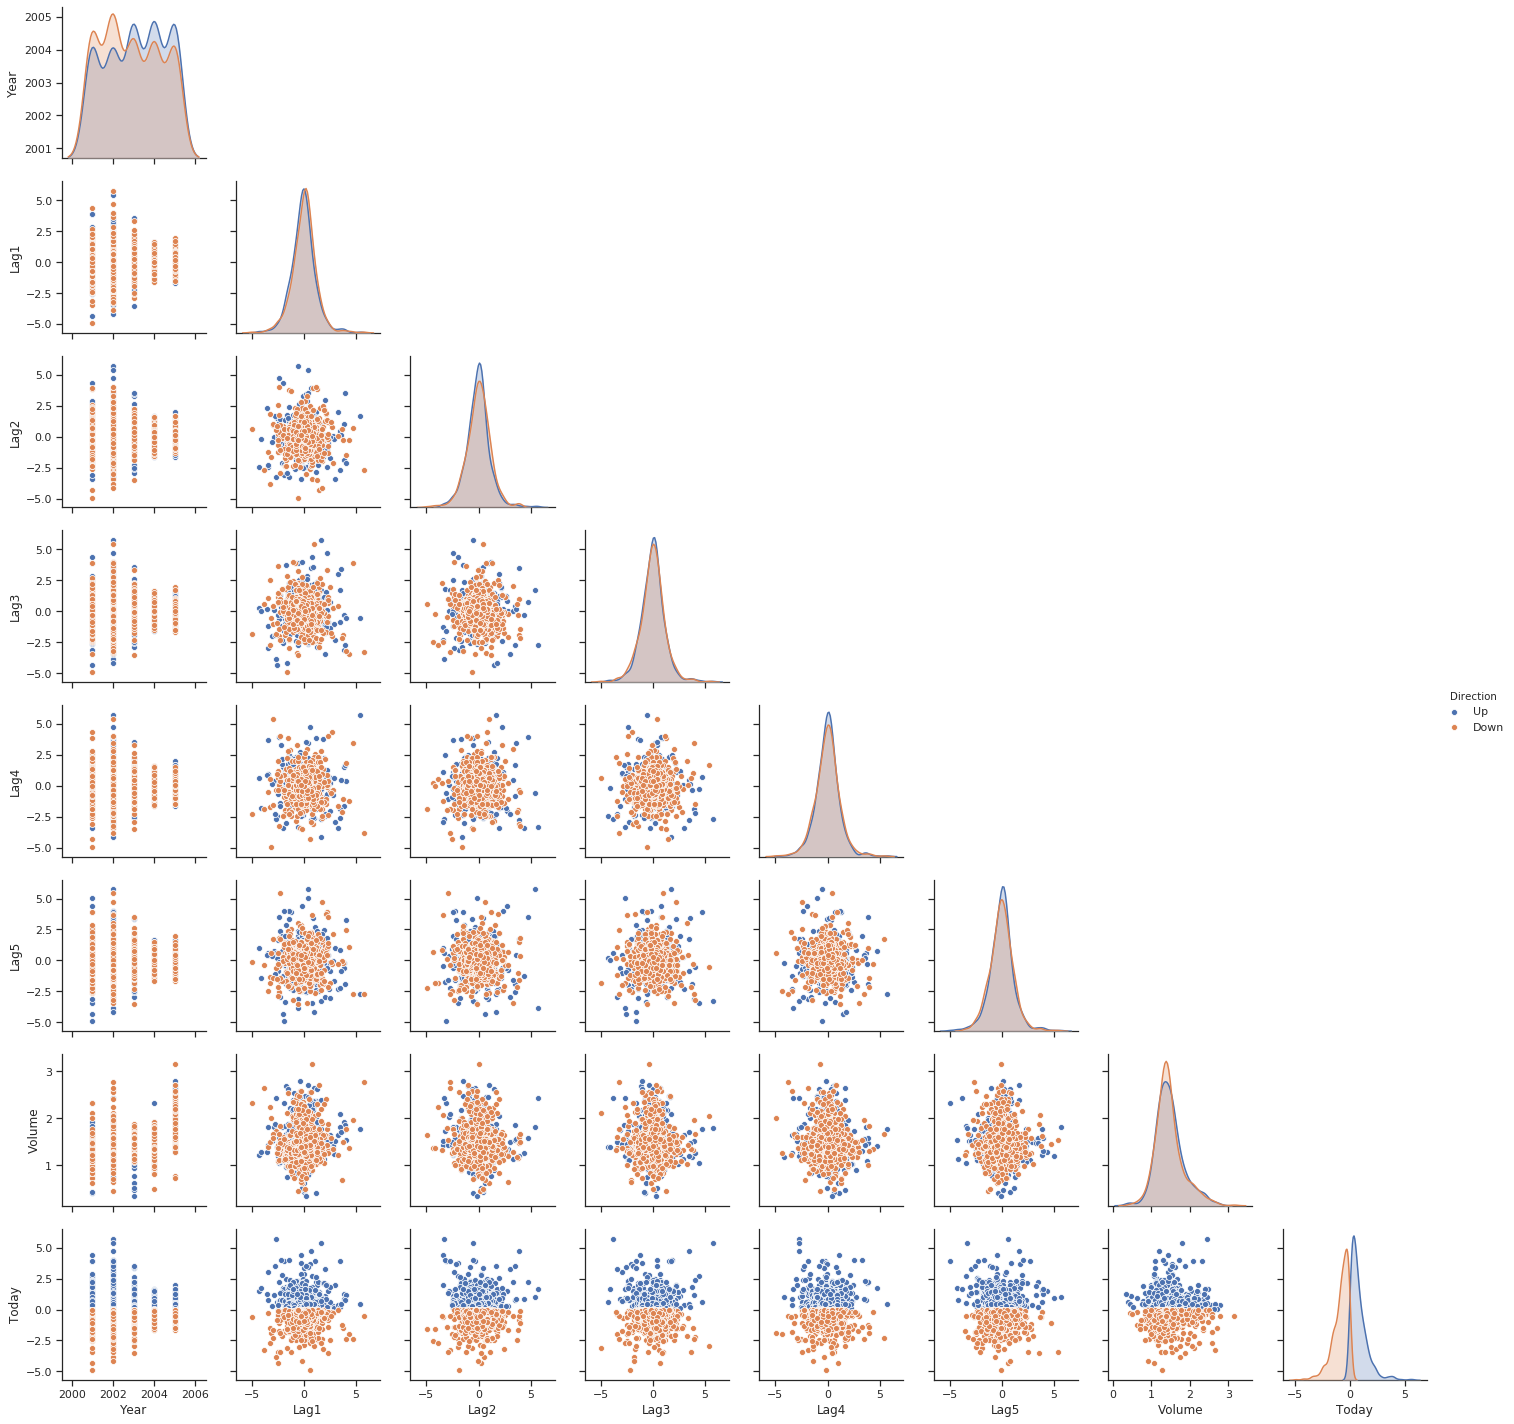

In [12]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
    

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Smarket, hue='Direction')
g.map_upper(hide_current_axis)

plt.show()

In [14]:
train_set = Smarket[Smarket['Year'] < 2005]
test_set = Smarket[Smarket['Year'] == 2005]

In [19]:
# Train set (Normal training dataset)
X_train = train_set.drop('Direction', axis=1)
y_train = train_set['Direction']


# Test Dataset
X_test = test_set.drop('Direction', axis=1)
y_test = test_set['Direction']

In [23]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_score = log_reg.predict(X_test)
print(accuracy_score(y_test, y_score))

0.996031746031746


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


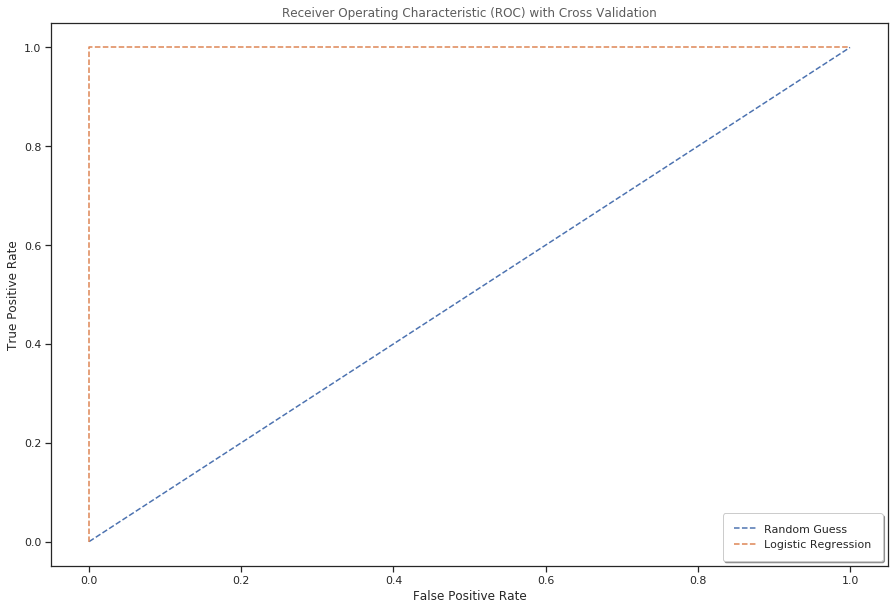

In [34]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label='Up')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label='Up')
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Guess')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with Cross Validation', alpha=0.75)

# show the legend
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='lower right')

plt.show()